<a href="https://colab.research.google.com/github/majumderarnob/BRACU_MAT215-Complex_Variables_and_Laplace_Trasformation/blob/main/Lab_3_Complex_Integration_and_Contour_Integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Complex Integration and Contour Integrals**

Make sure you remove and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [ ]:
NAME = "ARNOB MAJUMDER"
ID = "20301089"
LAB_SECTION = "09"

##Integration using sympy

We will use [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad) to compute a definite integral. Also a [`lambda`](https://www.w3schools.com/python/python_lambda.asp) function will be used, which can take any number of arguments, but can only have one expression.

Single integrals

$$
\int_{0}^{1} x^{3} \sin (3 x) e^{3x} d x
$$

In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
integrand = lambda x: x**3 * np.sin(3*x) * np.exp(3*x)
integral, integral_error = quad(integrand, 0, 1)
print (integral)
print (integral_error)

1.472127601108333
1.6343899579366694e-14


In [2]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
expression = lambda x: x**3 * np.sin(3*x) * np.exp(3*x)
integral, integral_error = quad(expression, 0, 1)
print(integral)
print(integral_error)
integral = quad(expression, 0, 1)[0]
print(integral)

1.472127601108333
1.6343899579366694e-14
1.472127601108333


Double Integrals

$$
\int_{0}^{1} \int_{-x}^{x^{2}} \cos \left(x+y^{2}\right) d y d x
$$

In [3]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.cos(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)
print (integral)
print (integral_error)

0.5131189124115851
1.2222205528786866e-14


In [4]:
from scipy.integrate import dblquad
expression = lambda y, x: np.cos(x+y**2)
lower_y = lambda x: -x
upper_y = lambda x: x**2
integral, integral_error = dblquad(expression, 0, 1, lower_y, upper_y)
print(integral)
print(integral_error)

0.5131189124115851
1.2222205528786866e-14


## Integration using Complex Numbers



we define definite integrals of $w(t)$ over the domain $a ≤ t ≤ b$ as follows:


$$
\int_{b}^{a} w(t) d t=\int_{b}^{a} u(t) d t+i \int_{b}^{a} v(t) d t
$$
Lets evaluate,
$$
\int_{1}^{2}\left(\frac{1}{t}-i\right)^{2} d t
$$

We will use `symbols` from `sympy`, discussed in last class, to evaluate in terms of $i$. Also here, we can apply integrals over a range, or in terms of $x$.

In [5]:
t = sp.symbols('t', real=True)
z1= ((1/t)-1j)**2
print(sp.integrate(z1,(t,2,1)))   #applying range
z2=sp.integrate(z1,t)             # integrate in terms of x
print(z2)
print(z2.subs(t,2)-z2.subs(t,1))  #alternate method

0.5 + 2.0*I*log(2)
-1.0*t - 2.0*I*log(t) - 1.0/t
-0.5 - 2.0*I*log(2)


In [6]:
var = 2 + 1j
print(type(var))

<class 'complex'>


##Task 1:

Find the values of: 

$a. 
\int_{0}^{1}\left(\frac{t^2}{2}-i\right)^{3} d t
$

$b. 
\int_{0}^{2}\left(\frac{z^3-4}{4}+2i\right) d z
$

$c. 
\int\left(\frac{x^2-4x+5y}{4x}\right) d x
$

In [13]:
# YOUR CODE HERE
#Task_1(a)
t = sp.symbols('t', real = True)
z1= ( (t ** 2) / 2 - 1j) ** 3
print(sp.integrate(z1,(t, 0, 1)))

-0.482142857142857 + 0.85*I


In [14]:
#Task_1(b)
z= sp.symbols('z', real=True)
z1 =(((z ** 3) - 4) / 4 + 2j)
print(sp.integrate(z1,(z, 0, 2)))

-1 + 4.0*I


In [15]:
#Task_1(c)
x = sp.symbols('x')
y= sp.symbols('y')
f= (x**2 - 4*x + 5*y) / (4 * x)
fInt=sp.integrate(f, x).simplify()
print(fInt)

x**2/8 - x + 5*y*log(x)/4


##Contour Integrals

Integrals of **complex valued functions** of a **complex variable** are defined on a **contour** rather than on intervals of the real line.

A **contour** is an arc consisting of a finite number of connected smooth arcs; that is, a **contour** is a piecewise smooth arcs joined end to end.


Let's use $f(z) = \bar{z}$ and evaluate along two curves. Consider breaking up the contour as showed in the figure below,

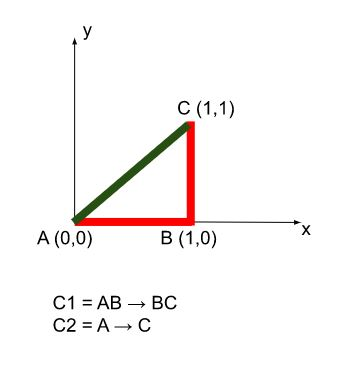

Now , to evaluate the integral $\int_{C1} \left(\bar{z}\right) d z $ over the contour given by the curve C1. We can write this as,

$$A [0,0], B[1,0], C[1,1]$$


$$\int_{C1} \left(\bar{z}\right) d z=\int_{AB} \left(\bar{z}\right) d z+\int_{BC} \left(\bar{z}\right) d z$$

If $$z=x+iy$$ then $$dz =dx+i dy$$hence $$\bar{z}dz =xdx+ydy+ixdy-iydx$$ 

For $AB$, we can take $y = 0$, hence $dy = 0$ and $ x\epsilon [0,1] $. For $BC, x=1, dx=0$ and $y\epsilon [0,1]$. For $AC, y=x,$ and $dy=dx$.Then we can subtitute in the above equation to find the contour integrals over $C1$ and $C2$.

##Task 2:

a. Evaluate $\int_{C1} \left(\bar{z}\right) d z $ by finding the integral over $AB$ and $BC$.

b. Also, evaluate $\int_{C2} \left(\bar{z}\right) d z $ by finding the integral over $AC$.

c. Hence identify, if contour integrals are path dependant or not?


[*Use your knowledge in theory to solve for the integrals in C1 and C2 manually, an then integrate using Python.*]


In [19]:
# YOUR CODE HERE
#task_2(a)
x= sp.symbols('x', real = True)
y= sp.symbols('y')

z1= x - 0j
intZ_1 = sp.integrate(z1,(x, 0, 1))

z2= y + 0j
intZ_2= sp.integrate(z2,(y, 0, 1))
c1= intZ_1 + intZ_2

print(c1)

1


In [17]:
#task_2(b)
x = sp.symbols('x', real= True)
z1= 2*x 
c2 = sp.integrate(z1,(x,0,1))
print(c2)

1


In [ ]:
#task_2(c)
print("Contour Intgrals are path independent as its values are same")